In [1]:
# --- Data Handling ---
import pandas as pd
import numpy as np
import os

# --- Data Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preprocessing ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- To Save The Processed Data ---
import joblib

# Set some display options for pandas and seaborn for better visualization
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Define the path to the raw data file
# Using os.path.join is a good practice as it works across different operating systems
RAW_DATA_PATH = os.path.join(r"D:\Satvik\Projects\College\Minor\Code\backend", "data", "raw", "heart_failure_clinical_records_dataset.csv")

# Load the dataset
df = pd.read_csv(RAW_DATA_PATH)

print("Data loaded successfully!")

Data loaded successfully!


In [4]:
# Display the first 5 rows to see what the data looks like
print("First 5 rows of the dataset:")
display(df.head())

# Get a concise summary of the dataframe, including data types and non-null values
print("\nDataset Information:")
df.info()

# Get descriptive statistics for each numerical column
print("\nDescriptive Statistics:")
display(df.describe())

First 5 rows of the dataset:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64


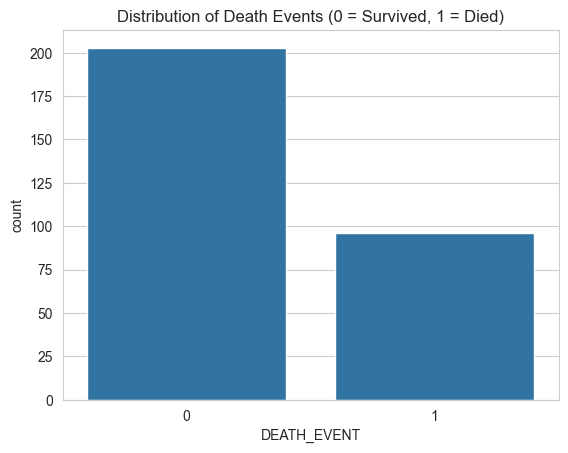

In [5]:
# Check the distribution of our target variable
print(df['DEATH_EVENT'].value_counts(normalize=True))

# Visualize the distribution
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Distribution of Death Events (0 = Survived, 1 = Died)')
plt.show()

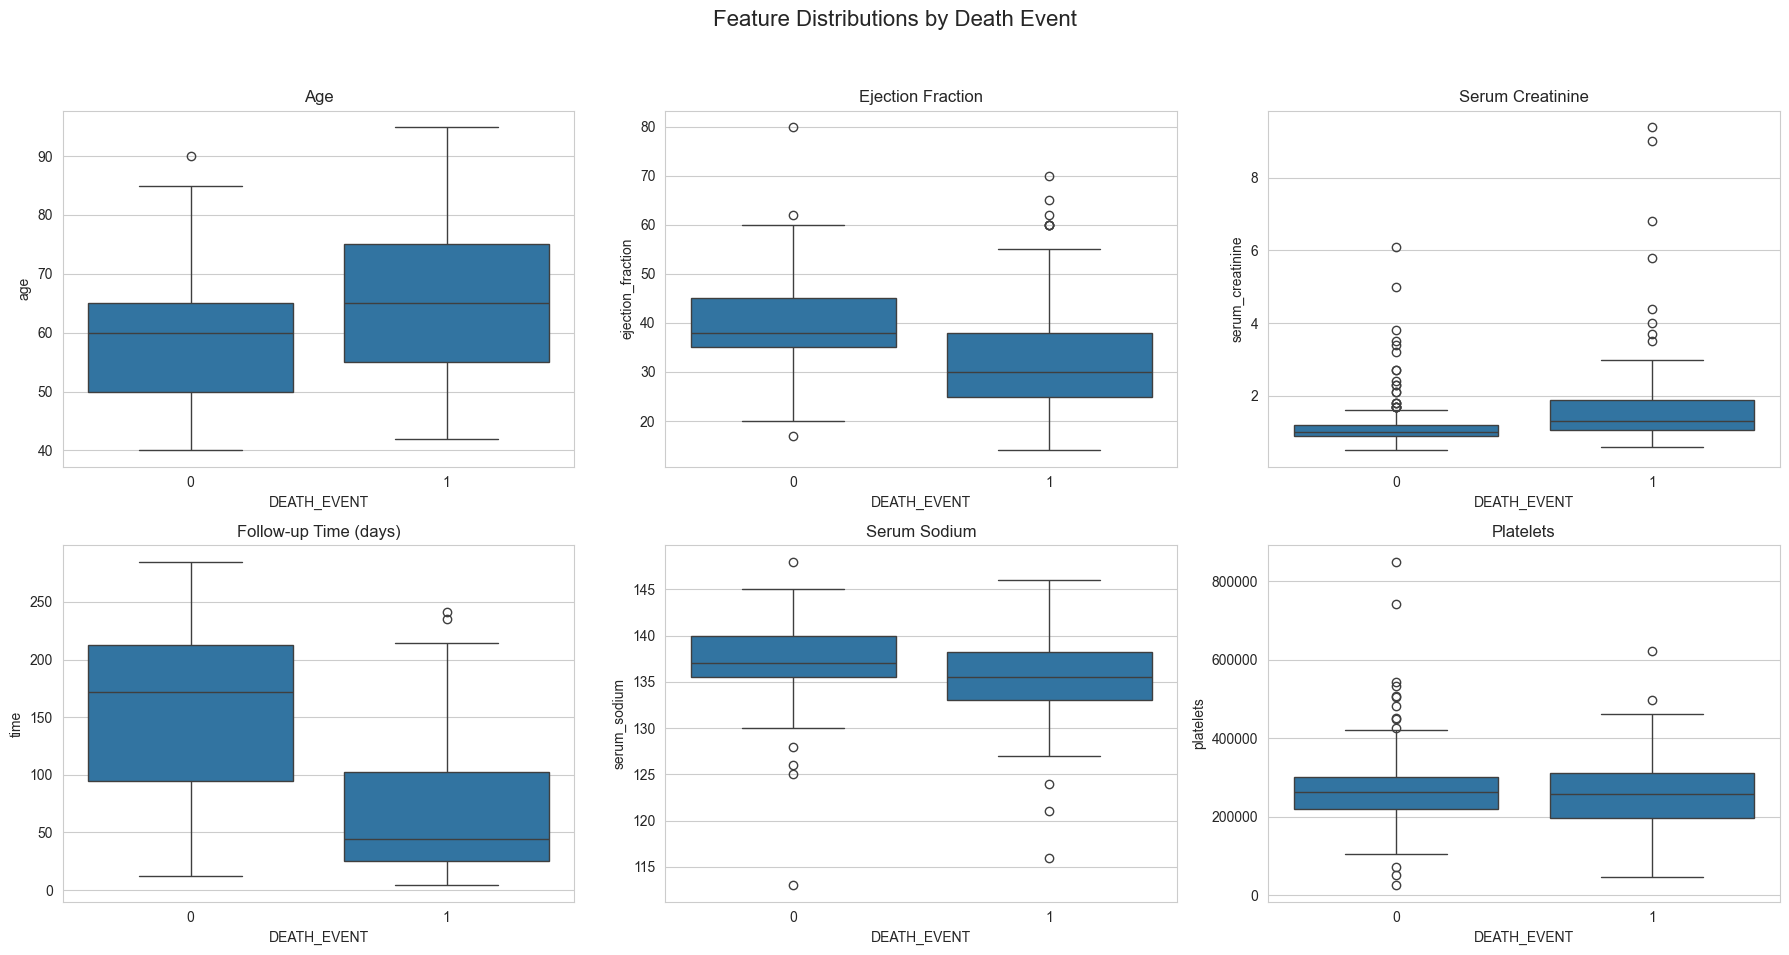

In [6]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Feature Distributions by Death Event', fontsize=16)

# Age vs. Death Event
sns.boxplot(ax=axes[0, 0], x='DEATH_EVENT', y='age', data=df)
axes[0, 0].set_title('Age')

# Ejection Fraction vs. Death Event
sns.boxplot(ax=axes[0, 1], x='DEATH_EVENT', y='ejection_fraction', data=df)
axes[0, 1].set_title('Ejection Fraction')

# Serum Creatinine vs. Death Event
sns.boxplot(ax=axes[0, 2], x='DEATH_EVENT', y='serum_creatinine', data=df)
axes[0, 2].set_title('Serum Creatinine')

# Time vs. Death Event
sns.boxplot(ax=axes[1, 0], x='DEATH_EVENT', y='time', data=df)
axes[1, 0].set_title('Follow-up Time (days)')

# Serum Sodium vs. Death Event
sns.boxplot(ax=axes[1, 1], x='DEATH_EVENT', y='serum_sodium', data=df)
axes[1, 1].set_title('Serum Sodium')

# Platelets vs. Death Event
sns.boxplot(ax=axes[1, 2], x='DEATH_EVENT', y='platelets', data=df)
axes[1, 2].set_title('Platelets')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

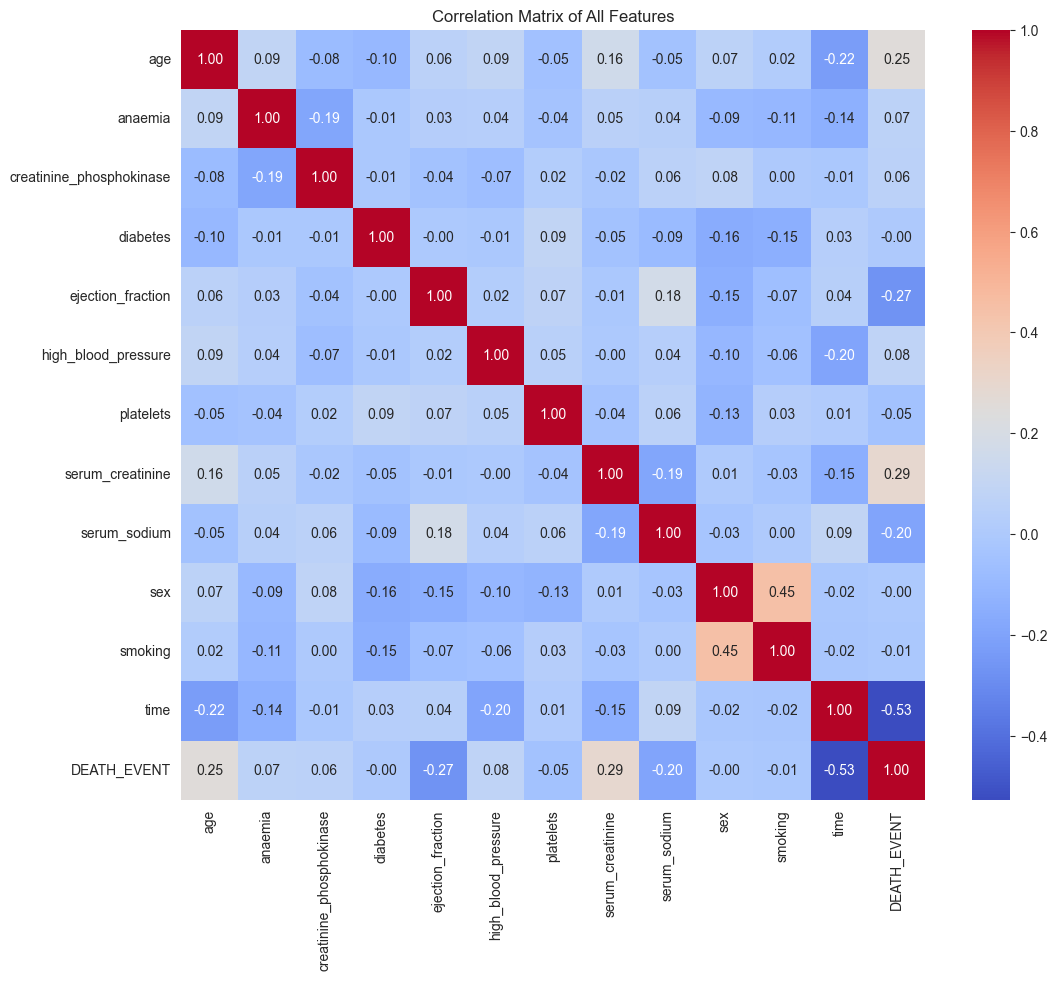

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

In [8]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [9]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (239, 12)
Testing set shape: (60, 12)


In [10]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the SAME scaler
X_test_scaled = scaler.transform(X_test)

# For convenience, let's put the scaled data back into pandas DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nFirst 5 rows of the scaled training data:")
display(X_train.head())


First 5 rows of the scaled training data:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.269050,1.110696,-0.200735,-0.900337,0.176528,-0.770281,-1.004722,-0.360437,0.559915,-1.333818,-0.682831,-0.467847
1,-0.706883,-0.900337,-0.534318,1.110696,1.847425,-0.770281,1.051685,-0.544467,-0.345802,0.749728,-0.682831,-1.359167
2,1.219579,-0.900337,-0.020580,-0.900337,-1.494369,1.298227,0.013401,0.467698,-1.477949,0.749728,-0.682831,-1.591685
3,0.256348,-0.900337,-0.455129,-0.900337,-1.076645,-0.770281,-0.178127,0.927773,-0.345802,0.749728,-0.682831,1.121028
4,-1.407414,-0.900337,-0.020580,-0.900337,-1.494369,1.298227,-1.387778,0.191653,-0.345802,0.749728,-0.682831,0.681827


In [ ]:
# Define paths for processed data
PROCESSED_DATA_DIR = os.path.join(r"D:\Satvik\Projects\College\Minor\Code\backend", "data", "processed")
SCALER_PATH = os.path.join(r"D:\Satvik\Projects\College\Minor\Code\backend", "models", "scaler.joblib")

# Create the directories if they don't exist
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(os.path.dirname(SCALER_PATH), exist_ok=True)


# Save the data sets
joblib.dump(X_train, os.path.join(PROCESSED_DATA_DIR, "X_train.joblib"))
joblib.dump(X_test, os.path.join(PROCESSED_DATA_DIR, "X_test.joblib"))
joblib.dump(y_train, os.path.join(PROCESSED_DATA_DIR, "y_train.joblib"))
joblib.dump(y_test, os.path.join(PROCESSED_DATA_DIR, "y_test.joblib"))

# Save the scaler
joblib.dump(scaler, SCALER_PATH)

print("\nProcessed data and scaler saved successfully!")


Processed data and scaler saved successfully!
